 Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
• Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
• Examine Irish context:
o Climate change signals: (see Maynooth study: The emergence of a climate change 
signal in long-term Irish meteorological observations - ScienceDirect)
• Fuse and analyse data from various data sources and format fused data set as a pandas 
dataframe and export to csv and json formats
• For all of the above variables, analyse the data, the trends and the relationships between 
them (temporal leads/lags/frequency analysis).
• Predict global temperature anomaly over next few decades (synthesise data) and compare to 
published climate models if atmospheric CO2 trends continue
• Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)


In [1014]:
import numpy as np  
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sea

## CO2 dataset

This excel document contains data from 800k years in the past up to 2001. 
(Further adjustment to the data file will be completed later to include data up to 2022).

This data includes updated data for CO2 composite with the removal of analytical bias per Bereiter et al 2015. It replaces the older version of the data from Luthi et al 2008.

I have converted this excel file to a csv format so that it will be easier to use and all so all of the data will be in one uniform format.


In [1015]:
# Read and store content of an excel file  
IPCC1 = pd.read_excel ("IPCCreport1.xlsx", sheet_name='CO2 Composite') 
  
# Writing the excel file into csv file 
IPCC1.to_csv ("IPCC.csv") 
    
# read csv file and convert into a dataframe object 
IPCC = pd.read_csv("IPCC.csv", skiprows=15, header=None) # skipping first 15 rows as they do not contain actual data

IPCC = IPCC.iloc[:, 1:] # skipping first column as it just contains the row number; not actual data. The 1 specifies to skip column 0

IPCC.columns = ['Gasage (yr BP)', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'] # setting column titles

IPCC.to_csv("IPCC.csv", index=None) # saving the csv file back to the dataframe with the adjustments made


In [1016]:
IPCC['Year'] = 1950 - IPCC['Gasage (yr BP)'] # to get year in actual values as it was measured in years since 1950
IPCC = IPCC.sort_values('Year', ascending=True)
IPCC = IPCC.iloc[:, 1: ] # removing first column as have year now calculated
IPCC = IPCC.iloc[:, [0, 2]] # only want first and 3rd column 
IPCC.to_csv("IPCCCO2Data_Year.csv", index=False) # adding year column 

# Mauna Loa CO2 data

In [1017]:
MLC = pd.read_csv('MaunaLoaCO2.txt', skiprows=88, header=None, delim_whitespace=True, engine='python') 
#true showing that the data in the text file is separated by whitespace; skipping 86 rows as only want data for 2000 onwards
MLC = MLC.iloc[:, :-1 ]
MLC.columns = ['Year', 'Mean CO2']
MLC.to_csv (r'MaunaLoaCO2.csv', index=None)

col = MLC.pop('Year')
MLC.insert(1, 'Year', col)

MLC.to_csv('UpdatedMaunaLoaCO2.csv', index=0)


In [1018]:

with open('IPCCCO2Data_Year.csv', 'a', newline='') as f1: # opening the file for appending
    writer = csv.writer(f1)
    with open('UpdatedMaunaLoaCO2.csv', 'r') as f2: # opening the file to write it to f1
        reader = csv.reader(f2)
        next(reader) # to skip column titles when appending
        for row in reader:
            writer.writerow(row)

combined_data = pd.read_csv('IPCCCO2Data_Year.csv')
col = combined_data.pop('CO2 (ppmv)')
combined_data.insert(1, 'CO2 (ppmv)', col)

combined_data.to_csv('CombinedIPCCCO2Data_Year.csv', index=0)

# Temperature data

In [1019]:
columns = ['Bag', 'ztop','Age','Deuterium', 'Temperature Anomoly']

data = pd.read_csv('EpicaTemp.txt', skiprows=92, delim_whitespace=True, names=columns, engine='python') 
#true showing that the data in the text file is separated by whitespace

Epica = data[['Age', 'Temperature Anomoly']] # only want columns with Age and Temperature (other columns contain not applicable)

Epica.to_csv (r'EpicaTemp.csv', index=None)


In [1020]:
Epica['Year'] = 1950 - Epica['Age'] # to get year in actual values as it was measured in years since 1950
Epica = Epica.iloc[:, 1: ]
Epica.to_csv("EpicaTempData_Year.csv", index=False)

C:\Users\rfeel\AppData\Local\Temp\ipykernel_23920\1625353319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Epica['Year'] = 1950 - Epica['Age'] # to get year in actual values as it was measured in years since 1950


In [1021]:
#Mauna Loa temps  - not exactly from Mauna Loa but an approximate location
MLT = pd.read_csv('HawaiiTemp.txt', delim_whitespace=True, engine='python') 
#true showing that the data in the text file is separated by whitespace
MLT.columns = ['Year', 'Average Annual Temperature (in degrees Celcius)']
MLT.to_csv (r'HawaiiTemp.csv', index=None)

MLT.to_csv('UpdatedHawaiiTemp.csv', index=0)


In [1022]:
Jouzel = pd.read_excel ("JouzelTempData.xlsx", usecols=[2,5]) 

# Write the dataframe object into csv file 
Jouzel.to_csv ("JouzelTempData.csv") 
 
# read csv file and convert into a dataframe object 
Jouzel = pd.read_csv("JouzelTempData.csv") 

Jouzel.drop('Unnamed: 0', axis=1, inplace=True) # removing unwanted index
#Jouzel = Jouzel.sort_values('EDC3béta', ascending=False)

Jouzel.to_csv("JouzelTempData.csv", index=False) # saving the csv file back to the dataframe with the adjustments made

In [1023]:

Jouzel['Year(for Temp)'] = 1950 - Jouzel['EDC3béta'] # to get year in actual values as it was measured in years since 1950
Jouzel = Jouzel.iloc[:, 1: ]
Jouzel.to_csv("JouzelTempData_Year.csv", index=False)

In [1024]:
df = pd.read_csv('JouzelTempData_Year.csv')

column = 'temp'
df['celsius'] = df['temp'] - 273.15 # change from kelvin to celcius

average = df['celsius'][0:87].mean()
#The temperature anomaly in celsius is calculated.

df['anomaly'] = df['celsius'] - average # calculating the temp anomoly for each year

print(f'The average of the column {column} is {average}')

df.to_csv('Jouzel_with_anomalies.csv', index=False)


The average of the column temp is -55.73850574712642


In [1025]:
from csv import writer
#adding data for 2005 and 2011; this was the most recent temperature data I could source
# I have not added general global temperatures as these will differ from the Dome C temps which is one of the coldest places
# on earth
#Thus, using the normal global average will show a sudden shift in the most recent data and unduly alter the trend

# List containing the row data
row = ['Na', '2005', '-54.741', '0.29' ]

row2 = ['Na', '2011', '-52.463', '1.48']

# Open the CSV file in append mode
with open('Jouzel_with_anomalies.csv', 'a') as f_object:
    # Create a writer object
    writer_object = writer(f_object)
    # Add the row to the CSV file
    writer_object.writerow(row)
    writer_object.writerow(row2)

# add tempeature anomalies for the past few years/more recent temperatures 

In [1026]:
JouzelAnomalies = pd.read_csv('Jouzel_with_anomalies.csv')
JouzelAnomalies = JouzelAnomalies.sort_values('Year(for Temp)', ascending=True)

JouzelAnomalies.to_csv('Jouzel_anomalies_updated.csv', index=False)


In [1027]:
# newline is set to '' so that there is no space between the rows in the output csv
with open('CombinedIPCCCO2Data_Year.csv', 'r') as t1, open('Jouzel_anomalies_updated.csv', 'r') as t2, open('Combination.csv', 'w', newline='') as output:
     r1 = csv.reader(t1, delimiter=',')  # delimiter is so the output is separated by commas
     r2 = csv.reader(t2, delimiter=',')
     w = csv.writer(output, delimiter=',')
     for a, b in zip(r1, r2):
             w.writerow(a + b)

# above is adapted from https://stackoverflow.com/questions/45133919/merging-two-csv-files-together-side-by-side

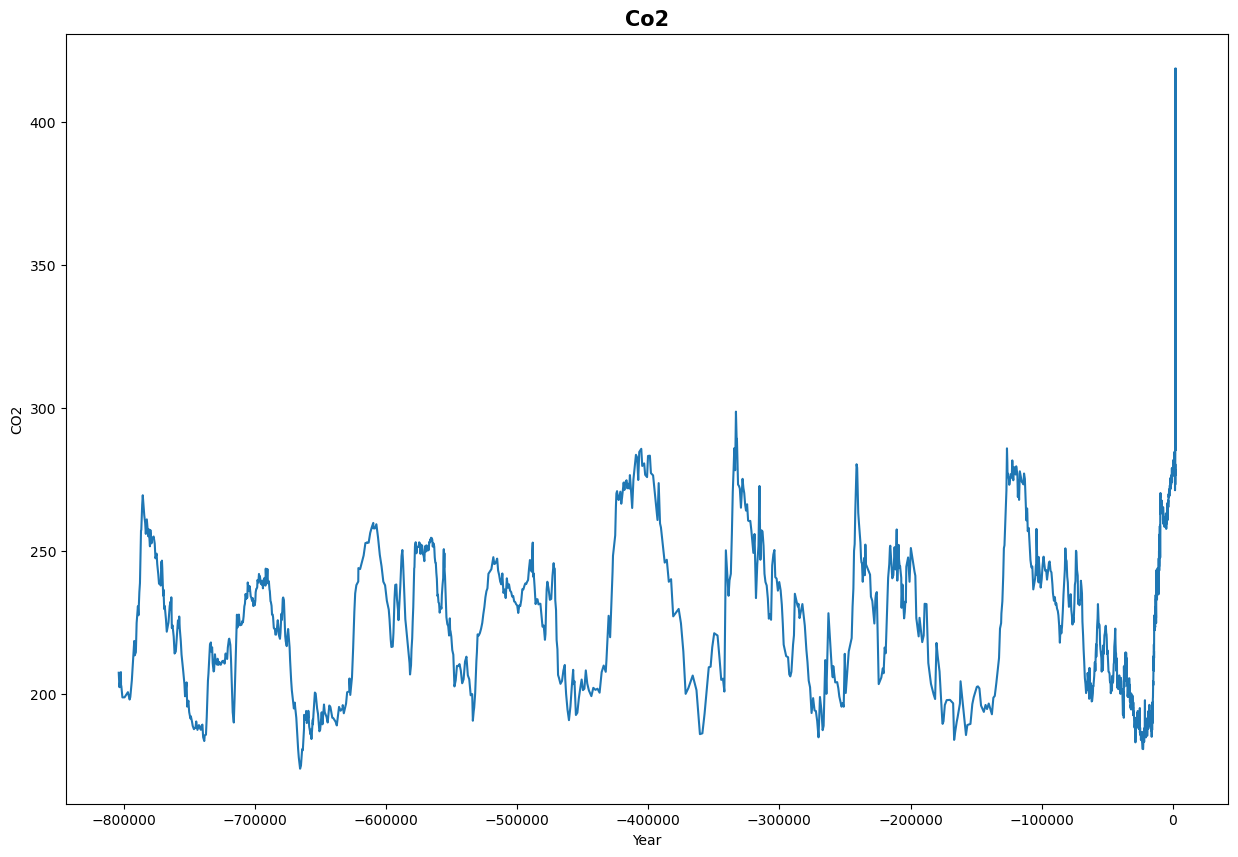

In [1028]:
CombinedData = pd.read_csv('Combination.csv')
fig, ax = plt.subplots(figsize=(15, 10 ))

ax.plot(CombinedData['Year'], CombinedData['CO2 (ppmv)'])
ax.set_xlabel('Year')
ax.set_ylabel('CO2')

ax.set_title('Co2', weight ='bold', size=15)
plt.show()

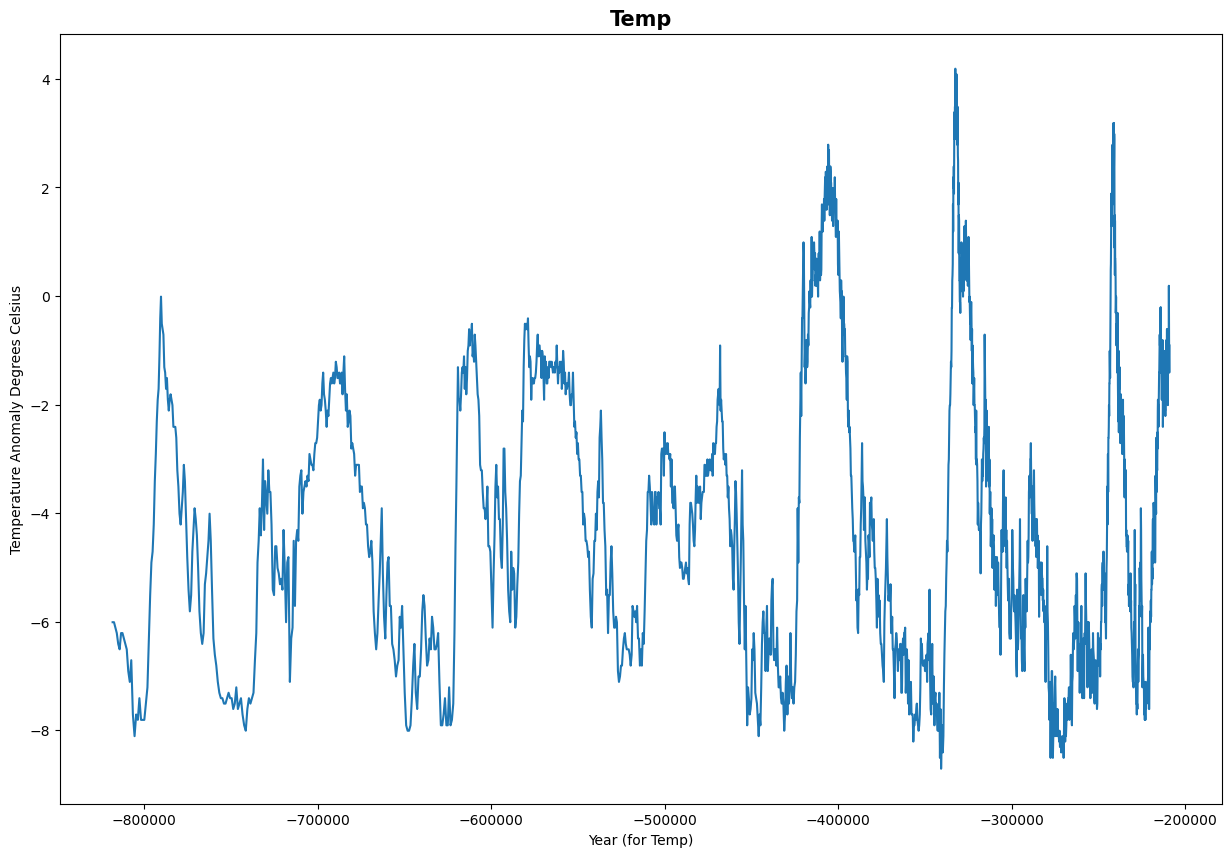

In [1029]:
CombinedData = pd.read_csv('Combination.csv')
fig, ax = plt.subplots(figsize=(15, 10 ))

ax.plot(CombinedData['Year(for Temp)'], CombinedData['anomaly'])
ax.set_xlabel('Year (for Temp)')
ax.set_ylabel('Temperature Anomaly Degrees Celsius')

ax.set_title('Temp', weight ='bold', size=15)
plt.show()

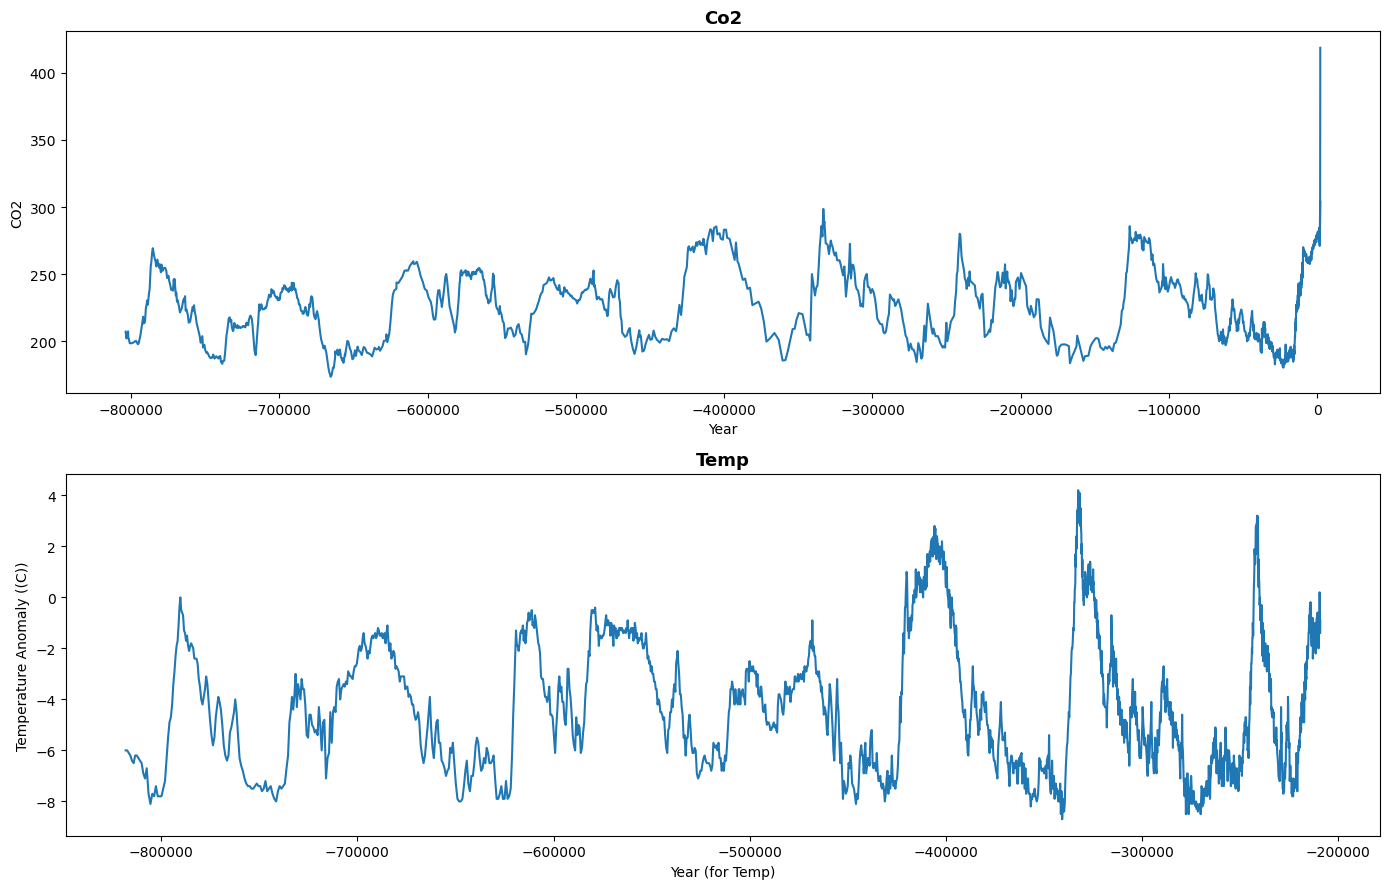

In [1030]:
import matplotlib.pyplot as plt
import pandas as pd

CombinedData = pd.read_csv('Combination.csv')

# Creating an empty plot for the data
fig, axs = plt.subplots(2, figsize=(14, 9))

# Plotting the CO2 levels over the years on one axis
axs[0].plot(CombinedData['Year'], CombinedData['CO2 (ppmv)'])
axs[0].set_xlabel('Year')
axs[0].set_ylabel('CO2')
axs[0].set_title('Co2', weight ='bold', size=13)

# Plotting the temperature anomalies over the years on the second axis
axs[1].plot(CombinedData['Year(for Temp)'], CombinedData['anomaly'])
axs[1].set_xlabel('Year (for Temp)')
axs[1].set_ylabel('Temperature Anomaly ((C))')
axs[1].set_title('Temp', weight ='bold', size=13)

plt.tight_layout()
plt.show()


# Analyse data, plots etc

## Methane data (3rd variable)

Column 1: EDC1999 depth (m)
Column 2: Gas Age (EDC3 gas age, years before 1950 AD)
Column 3: CH4 mean (ppbv)
Column 4: 1-sigma uncertainty (ppbv)
Column 5: Laboratory (b=Bern, g=Grenoble)

In [1031]:
data = pd.read_csv('Methanedatato1937.txt', skiprows=153, delim_whitespace=True, engine='python') 
#true showing that the data in the text file is separated by whitespace

data.to_csv (r'Methanedatato1937.csv', index=None)


In [1032]:
data = pd.read_csv('Methanedatato1980.txt', engine='python') 
#true showing that the data in the text file is separated by whitespace

data.to_csv (r'Methanedatato1980.csv', index=None)


In [1033]:
data = pd.read_csv('Methanedatato2022.txt', skiprows=45, engine='python') 
#true showing that the data in the text file is separated by whitespace

data.to_csv (r'Methanedatato2022.csv', index=None)
